**Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**


In [1]:
from google.colab import files
upload=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
list(df)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [4]:
df["Taxable.Income"]=["Good" if value > 30000
                      else "Risky" for value in df['Taxable.Income']]

In [5]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

Columns_to_encoder=["Undergrad","Marital.Status","Urban","Taxable.Income"]
for columns in Columns_to_encoder:
 df[columns]=LE.fit_transform(df[columns])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [6]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
X=df[["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]]
Y=df["Taxable.Income"]

In [8]:
df.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.012523,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,0.006081,-0.001564,-0.002213,0.064562
Taxable.Income,0.012523,0.006081,1.000000,0.012225,-0.001972,0.004830
City.Population,0.079579,-0.001564,0.012225,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001972,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.004830,-0.040098,-0.094559,1.000000


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [10]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [11]:
Y_pred_train=DTC.predict(X_train)
Y_pred_test=DTC.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score for Training Data:",ac1.round(3))
print("Accuracy Score for Test Data:",ac2.round(3))

Accuracy Score for Training Data: 1.0
Accuracy Score for Test Data: 0.687


In [13]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100,
                           max_samples=0.6,
                           max_features=0.7)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.6)

In [14]:
Y_pred_train=RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score for Training Data:",ac1.round(3))
print("Accuracy Score fro Test Data:",ac2.round(3))

Accuracy Score for Training Data: 0.929
Accuracy Score fro Test Data: 0.767


[Text(0.2983530405405405, 0.9814814814814815, 'x[2] <= 60278.5\ngini = 0.328\nsamples = 450\nvalue = [357, 93]'),
 Text(0.08108108108108109, 0.9444444444444444, 'x[2] <= 31266.5\ngini = 0.217\nsamples = 97\nvalue = [85, 12]'),
 Text(0.06756756756756757, 0.9074074074074074, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.0945945945945946, 0.9074074074074074, 'x[2] <= 31378.5\ngini = 0.258\nsamples = 79\nvalue = [67, 12]'),
 Text(0.08108108108108109, 0.8703703703703703, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10810810810810811, 0.8703703703703703, 'x[2] <= 37812.5\ngini = 0.242\nsamples = 78\nvalue = [67, 11]'),
 Text(0.04054054054054054, 0.8333333333333334, 'x[2] <= 36940.0\ngini = 0.401\nsamples = 18\nvalue = [13, 5]'),
 Text(0.02702702702702703, 0.7962962962962963, 'x[3] <= 18.5\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.013513513513513514, 0.7592592592592593, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.04054054054054054, 0.7592592592592593, 'x[2

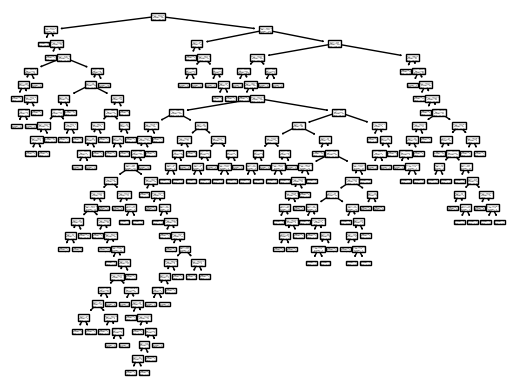

In [16]:
from sklearn import tree
tree.plot_tree(DTC)

AttributeError: ignored

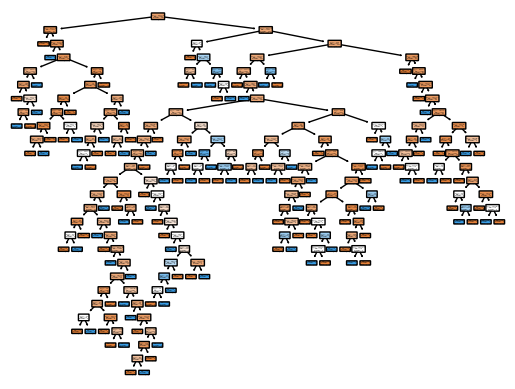

In [17]:
from sklearn import tree
import graphviz
data=tree.plot_tree(DTC,filled=True,rounded=True)
Graph=graphviz.Source(data)
Graph